<a href="https://colab.research.google.com/github/alloysArtifexLabs/IMAGE-AI/blob/image-classifier/AI_POWERED_HOUSE_DESIGN_GENERATOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import re

def parse_room_input(input_str):
    input_str = input_str.lower()
    pattern = r'(\d+)\s*(bedroom|bathroom|kitchen|living room)'
    matches = re.findall(pattern, input_str)
    rooms = {}
    for num, room in matches:
        key = room.replace(" ", "_")
        rooms[key] = int(num)
    return rooms

# Example usage
if __name__ == "__main__":
    test_input = "3 bedroom, 2 bathrooms, 1 kitchen"
    print(parse_room_input(test_input))


{'bedroom': 3, 'bathroom': 2, 'kitchen': 1}


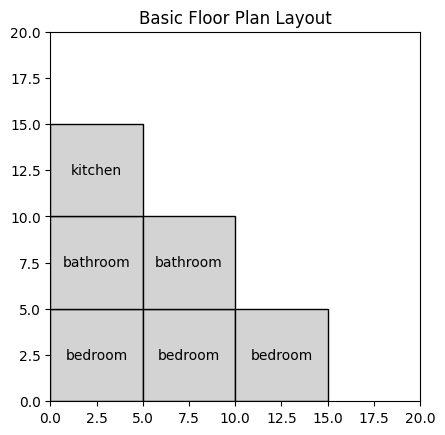

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Step 2: Generate a basic 2D floor plan layout
def generate_basic_floor_plan(rooms):
    # Define default room size
    room_width, room_height = 5, 5
    floor_plan = []

    # Simple grid placement: each room in a row, then new row for next room type
    y_offset = 0
    for room_type, count in rooms.items():
        x_offset = 0
        for i in range(count):
            room = {
                "type": room_type,
                "x": x_offset,
                "y": y_offset,
                "width": room_width,
                "height": room_height
            }
            floor_plan.append(room)
            x_offset += room_width  # Place next room to the right
        y_offset += room_height  # Move to next row for a different room type
    return floor_plan

def plot_floor_plan(floor_plan):
    fig, ax = plt.subplots()
    for room in floor_plan:
        rect = patches.Rectangle(
            (room["x"], room["y"]), room["width"], room["height"],
            edgecolor='black', facecolor='lightgray', fill=True
        )
        ax.add_patch(rect)
        # Add room type text centered in the rectangle
        ax.text(
            room["x"] + room["width"]/2,
            room["y"] + room["height"]/2,
            room["type"],
            ha='center', va='center'
        )
    ax.set_xlim(0, 20)
    ax.set_ylim(0, 20)
    ax.set_aspect('equal')
    plt.title("Basic Floor Plan Layout")
    plt.show()

# Example usage: assume parse_room_input from Step 1 is available
if __name__ == "__main__":
    test_input = "3 bedroom, 2 bathroom, 1 kitchen"
    rooms = parse_room_input(test_input)  # from Step 1
    floor_plan = generate_basic_floor_plan(rooms)
    plot_floor_plan(floor_plan)


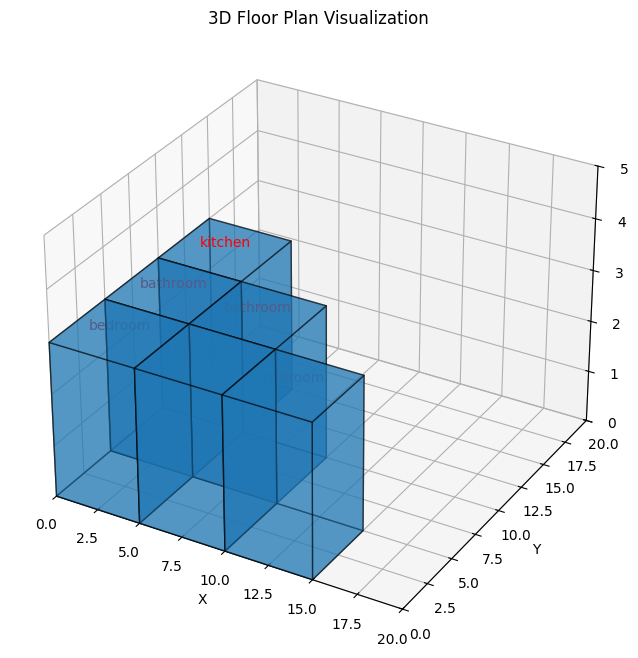

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d import Axes3D  # required for 3D plotting

def create_cuboid_vertices(room, height=3):
    # Unpack room parameters
    x, y, w, d = room["x"], room["y"], room["width"], room["height"]

    # Bottom vertices (z=0)
    v0 = [x, y, 0]
    v1 = [x + w, y, 0]
    v2 = [x + w, y + d, 0]
    v3 = [x, y + d, 0]

    # Top vertices (z=height)
    v4 = [x, y, height]
    v5 = [x + w, y, height]
    v6 = [x + w, y + d, height]
    v7 = [x, y + d, height]

    return [v0, v1, v2, v3, v4, v5, v6, v7]

def plot_3d_floor_plan(floor_plan, room_height=3):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # For each room, create cuboid faces and add them to the plot
    for room in floor_plan:
        verts = create_cuboid_vertices(room, height=room_height)

        # Define the 6 faces of the cuboid using the vertices
        faces = [
            [verts[0], verts[1], verts[2], verts[3]],  # bottom
            [verts[4], verts[5], verts[6], verts[7]],  # top
            [verts[0], verts[1], verts[5], verts[4]],  # front
            [verts[1], verts[2], verts[6], verts[5]],  # right
            [verts[2], verts[3], verts[7], verts[6]],  # back
            [verts[3], verts[0], verts[4], verts[7]]   # left
        ]

        # Create a 3D polygon collection for the room
        poly3d = Poly3DCollection(faces, alpha=0.5, edgecolor='k')
        ax.add_collection3d(poly3d)

        # Optionally, add room type text at the center of the top face
        center_x = room["x"] + room["width"] / 2
        center_y = room["y"] + room["height"] / 2
        ax.text(center_x, center_y, room_height, room["type"],
                ha='center', va='bottom', fontsize=10, color='red')

    # Set plot limits (adjust based on your floor plan dimensions)
    ax.set_xlim(0, 20)
    ax.set_ylim(0, 20)
    ax.set_zlim(0, room_height + 2)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z (Height)')
    plt.title("3D Floor Plan Visualization")
    plt.show()

# Example usage: using the floor_plan from Step 2
if __name__ == "__main__":
    test_input = "3 bedroom, 2 bathroom, 1 kitchen"
    rooms = parse_room_input(test_input)  # from Step 1
    floor_plan = generate_basic_floor_plan(rooms)  # from Step 2
    plot_3d_floor_plan(floor_plan, room_height=3)


In [7]:
import ipywidgets as widgets
from IPython.display import display, clear_output

def update_floor_plan(b):
    clear_output(wait=True)
    input_text = text_input.value
    rooms = parse_room_input(input_text)
    floor_plan = generate_basic_floor_plan(rooms)
    print("2D Floor Plan:")
    plot_floor_plan(floor_plan)
    print("3D Floor Plan:")
    plot_3d_floor_plan(floor_plan, room_height=3)
    display(text_input, update_button)

text_input = widgets.Text(
    value='3 bedroom, 2 bathroom, 1 kitchen',
    placeholder='Type your floor plan description',
    description='Floor Plan:',
    disabled=False
)
update_button = widgets.Button(
    description='Update Floor Plan',
    disabled=False
)
update_button.on_click(update_floor_plan)
display(text_input, update_button)


Text(value='3 bedroom, 2 bathroom, 1 kitchen', description='Floor Plan:', placeholder='Type your floor plan de…

Button(description='Update Floor Plan', style=ButtonStyle())

In [8]:
import random

def generate_refined_floor_plan(rooms, floor_width=30, floor_height=30, room_width=5, room_height=5, max_attempts=100):
    placed_rooms = []
    for room_type, count in rooms.items():
        for _ in range(count):
            placed = False
            attempts = 0
            while not placed and attempts < max_attempts:
                x = random.uniform(0, floor_width - room_width)
                y = random.uniform(0, floor_height - room_height)
                new_room = {"type": room_type, "x": x, "y": y, "width": room_width, "height": room_height}
                # Check for overlap with previously placed rooms
                overlap = any(
                    (x < r["x"] + r["width"] and x + room_width > r["x"] and
                     y < r["y"] + r["height"] and y + room_height > r["y"])
                    for r in placed_rooms
                )
                if not overlap:
                    placed_rooms.append(new_room)
                    placed = True
                attempts += 1
            if not placed:
                print(f"Warning: Could not place room '{room_type}' after {max_attempts} attempts.")
    return placed_rooms



2D Floor Plan with Corridors:


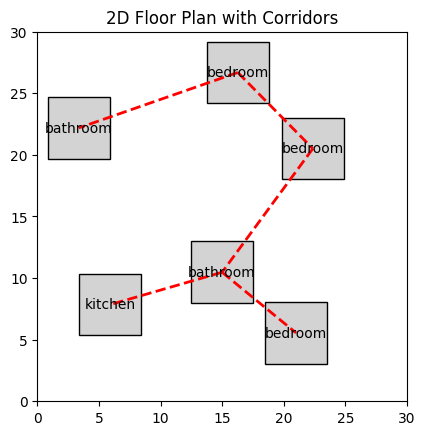

In [9]:
import math

def compute_center(room):
    return (room["x"] + room["width"] / 2, room["y"] + room["height"] / 2)

def compute_mst(centers):
    n = len(centers)
    if n == 0:
        return []

    visited = [False] * n
    visited[0] = True
    connected_nodes = [0]
    edges = []

    while len(connected_nodes) < n:
        min_distance = float('inf')
        min_edge = None

        for i in connected_nodes:
            for j in range(n):
                if not visited[j]:
                    # Euclidean distance between centers[i] and centers[j]
                    dist = math.sqrt((centers[i][0] - centers[j][0])**2 + (centers[i][1] - centers[j][1])**2)
                    if dist < min_distance:
                        min_distance = dist
                        min_edge = (i, j)

        if min_edge:
            i, j = min_edge
            visited[j] = True
            connected_nodes.append(j)
            # Store the actual coordinates for corridor drawing
            edges.append((centers[i], centers[j]))

    return edges

def plot_floor_plan_with_corridors(floor_plan):
    fig, ax = plt.subplots()
    # Draw each room as a rectangle and add the room label
    for room in floor_plan:
        rect = patches.Rectangle(
            (room["x"], room["y"]),
            room["width"],
            room["height"],
            edgecolor='black',
            facecolor='lightgray',
            fill=True
        )
        ax.add_patch(rect)
        ax.text(
            room["x"] + room["width"] / 2,
            room["y"] + room["height"] / 2,
            room["type"],
            ha='center',
            va='center'
        )

    # Compute centers for each room
    centers = [compute_center(room) for room in floor_plan]
    # Compute corridor connections using MST
    corridors = compute_mst(centers)

    # Draw corridors as dashed red lines
    for start, end in corridors:
        ax.plot([start[0], end[0]], [start[1], end[1]], 'r--', linewidth=2)

    ax.set_xlim(0, 30)
    ax.set_ylim(0, 30)
    ax.set_aspect('equal')
    plt.title("2D Floor Plan with Corridors")
    plt.show()

# Example usage:
if __name__ == "__main__":
    test_input = "3 bedroom, 2 bathroom, 1 kitchen"
    rooms = parse_room_input(test_input)               # from Step 1
    refined_floor_plan = generate_refined_floor_plan(rooms, floor_width=30, floor_height=30)
    print("2D Floor Plan with Corridors:")
    plot_floor_plan_with_corridors(refined_floor_plan)


In [10]:
def export_floor_plan_to_obj(floor_plan, room_height=3, filename="floor_plan.obj"):
    vertices = []
    faces = []
    vertex_counter = 1  # OBJ files use 1-indexing for vertices

    # Loop through each room and compute its vertices and faces
    for room in floor_plan:
        room_vertices = create_cuboid_vertices(room, height=room_height)
        vertices.extend(room_vertices)
        # Define faces with indices relative to this room's vertices
        room_faces = [
            [0, 1, 2, 3],   # bottom face
            [4, 5, 6, 7],   # top face
            [0, 1, 5, 4],   # front face
            [1, 2, 6, 5],   # right face
            [2, 3, 7, 6],   # back face
            [3, 0, 4, 7]    # left face
        ]
        for face in room_faces:
            # Convert room-face indices to global indices
            global_face = [vertex_counter + idx for idx in face]
            faces.append(global_face)
        vertex_counter += 8  # Each room adds 8 vertices

    # Write the vertices and faces to the OBJ file
    with open(filename, "w") as f:
        for v in vertices:
            f.write("v {} {} {}\n".format(v[0], v[1], v[2]))
        for face in faces:
            f.write("f {} {} {} {}\n".format(face[0], face[1], face[2], face[3]))
    print(f"Exported floor plan to {filename}")

# Example usage:
if __name__ == "__main__":
    test_input = "3 bedroom, 2 bathroom, 1 kitchen"
    rooms = parse_room_input(test_input)  # from Step 1
    refined_floor_plan = generate_refined_floor_plan(rooms, floor_width=30, floor_height=30)
    export_floor_plan_to_obj(refined_floor_plan, room_height=3, filename="floor_plan.obj")


Exported floor plan to floor_plan.obj


In [11]:
from google.colab import files

def download_obj_file(filename="floor_plan.obj"):
    files.download(filename)

# Example usage: Download the exported OBJ file
download_obj_file("floor_plan.obj")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Create additional interactive widgets for floor plan parameters
floor_width_widget = widgets.IntSlider(value=30, min=10, max=50, step=1, description='Floor Width:')
floor_height_widget = widgets.IntSlider(value=30, min=10, max=50, step=1, description='Floor Height:')
room_width_widget = widgets.IntSlider(value=5, min=3, max=15, step=1, description='Room Width:')
room_height_widget = widgets.IntSlider(value=5, min=3, max=15, step=1, description='Room Height:')
max_attempts_widget = widgets.IntSlider(value=100, min=10, max=500, step=10, description='Max Attempts:')

def update_floor_plan_with_params(b):
    clear_output(wait=True)
    # Get text input from previous widget (from Step 4)
    input_text = text_input.value  # text_input widget from Step 4
    rooms = parse_room_input(input_text)

    # Retrieve parameter values from the sliders
    fw = floor_width_widget.value
    fh = floor_height_widget.value
    rw = room_width_widget.value
    rh = room_height_widget.value
    attempts = max_attempts_widget.value

    # Generate refined floor plan with new parameters
    refined_floor_plan = generate_refined_floor_plan(rooms, floor_width=fw, floor_height=fh, room_width=rw, room_height=rh, max_attempts=attempts)

    print("2D Floor Plan with updated parameters:")
    plot_floor_plan_with_corridors(refined_floor_plan)
    print("3D Floor Plan with updated parameters:")
    plot_3d_floor_plan(refined_floor_plan, room_height=3)

    display(text_input, update_button, floor_width_widget, floor_height_widget, room_width_widget, room_height_widget, max_attempts_widget)

# Reuse the update button from Step 4 and set its callback to the new function
update_button.on_click(update_floor_plan_with_params)

# Display all interactive widgets
display(text_input, update_button, floor_width_widget, floor_height_widget, room_width_widget, room_height_widget, max_attempts_widget)


Text(value='3 bedroom, 2 bathroom, 1 kitchen', description='Floor Plan:', placeholder='Type your floor plan de…

Button(description='Update Floor Plan', style=ButtonStyle())

IntSlider(value=30, description='Floor Width:', max=50, min=10)

IntSlider(value=30, description='Floor Height:', max=50, min=10)

IntSlider(value=5, description='Room Width:', max=15, min=3)

IntSlider(value=5, description='Room Height:', max=15, min=3)

IntSlider(value=100, description='Max Attempts:', max=500, min=10, step=10)

In [13]:
import json
import ipywidgets as widgets
from IPython.display import display, clear_output

# Global variable to hold the current floor plan
current_floor_plan = None

def save_floor_plan_config(floor_plan, filename="floor_plan_config.json"):
    with open(filename, "w") as f:
        json.dump(floor_plan, f, indent=4)
    print(f"Configuration saved to {filename}")

def load_floor_plan_config(filename="floor_plan_config.json"):
    with open(filename, "r") as f:
        floor_plan = json.load(f)
    return floor_plan

def on_save_button_clicked(b):
    global current_floor_plan
    if current_floor_plan is not None:
        save_floor_plan_config(current_floor_plan)
    else:
        print("No floor plan available to save.")

def on_load_button_clicked(b):
    global current_floor_plan
    current_floor_plan = load_floor_plan_config()
    clear_output(wait=True)
    print("Loaded configuration:")
    plot_floor_plan_with_corridors(current_floor_plan)
    plot_3d_floor_plan(current_floor_plan, room_height=3)
    display(save_button, load_button)

# Create buttons for saving and loading
save_button = widgets.Button(description="Save Floor Plan")
load_button = widgets.Button(description="Load Floor Plan")
save_button.on_click(on_save_button_clicked)
load_button.on_click(on_load_button_clicked)

# Display the buttons
display(save_button, load_button)


Button(description='Save Floor Plan', style=ButtonStyle())

Button(description='Load Floor Plan', style=ButtonStyle())

Optimized 2D Floor Plan with Corridors:


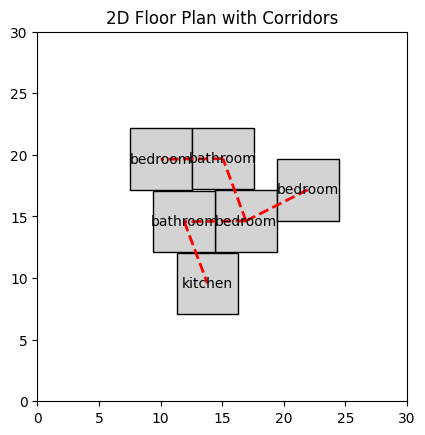

Optimized 3D Floor Plan:


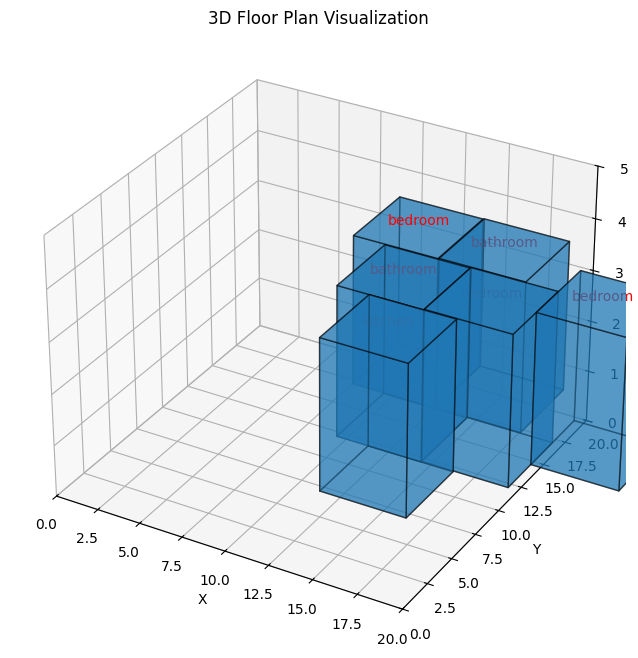

In [14]:
def rooms_overlap(room1, room2):
    # Returns True if room1 and room2 overlap.
    return (room1["x"] < room2["x"] + room2["width"] and
            room1["x"] + room1["width"] > room2["x"] and
            room1["y"] < room2["y"] + room2["height"] and
            room1["y"] + room1["height"] > room2["y"])

def cost_function(floor_plan, floor_width, floor_height):
    # Define a cost based on how far rooms are from the floor center
    # plus a heavy penalty if any rooms overlap.
    total_cost = 0
    center_x, center_y = floor_width / 2, floor_height / 2
    for room in floor_plan:
        room_center = (room["x"] + room["width"] / 2, room["y"] + room["height"] / 2)
        total_cost += ((room_center[0] - center_x) ** 2 + (room_center[1] - center_y) ** 2)

    # Add a large penalty for each overlapping pair.
    for i in range(len(floor_plan)):
        for j in range(i + 1, len(floor_plan)):
            if rooms_overlap(floor_plan[i], floor_plan[j]):
                total_cost += 1000  # Overlap penalty

    return total_cost

def optimize_floor_plan(floor_plan, floor_width=30, floor_height=30, iterations=1000, step_size=0.5):
    # Make a deep copy of the floor plan to start optimization.
    best_plan = [room.copy() for room in floor_plan]
    best_cost = cost_function(best_plan, floor_width, floor_height)

    current_plan = [room.copy() for room in floor_plan]
    current_cost = best_cost

    for _ in range(iterations):
        # Randomly pick a room to adjust.
        idx = random.randrange(len(current_plan))
        old_x, old_y = current_plan[idx]["x"], current_plan[idx]["y"]

        # Propose a new position by making a small random adjustment.
        new_x = old_x + random.uniform(-step_size, step_size)
        new_y = old_y + random.uniform(-step_size, step_size)

        # Ensure new positions stay within the floor boundaries.
        new_x = max(0, min(new_x, floor_width - current_plan[idx]["width"]))
        new_y = max(0, min(new_y, floor_height - current_plan[idx]["height"]))
        current_plan[idx]["x"] = new_x
        current_plan[idx]["y"] = new_y

        new_cost = cost_function(current_plan, floor_width, floor_height)

        if new_cost < current_cost:
            current_cost = new_cost
            # Update the best plan if this move improves the overall cost.
            if new_cost < best_cost:
                best_cost = new_cost
                best_plan = [room.copy() for room in current_plan]
        else:
            # Revert the change if cost did not improve.
            current_plan[idx]["x"] = old_x
            current_plan[idx]["y"] = old_y

    return best_plan

# Example usage:
if __name__ == "__main__":
    test_input = "3 bedroom, 2 bathroom, 1 kitchen"
    rooms = parse_room_input(test_input)  # From Step 1
    # Generate a refined floor plan with random non-overlapping placement.
    refined_floor_plan = generate_refined_floor_plan(rooms, floor_width=30, floor_height=30, room_width=5, room_height=5)

    # Optimize the floor plan layout.
    optimized_plan = optimize_floor_plan(refined_floor_plan, floor_width=30, floor_height=30, iterations=1000, step_size=0.5)

    print("Optimized 2D Floor Plan with Corridors:")
    plot_floor_plan_with_corridors(optimized_plan)

    print("Optimized 3D Floor Plan:")
    plot_3d_floor_plan(optimized_plan, room_height=3)


2D Floor Plan with Furniture Layout:


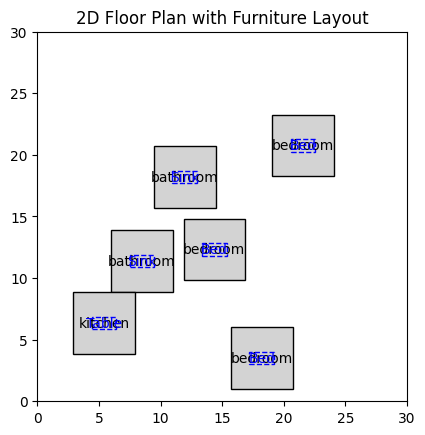

In [15]:
def add_furniture_to_floor_plan(floor_plan):
    # Define default furniture items for each room type.
    furniture_items = {
        "bedroom": "Bed",
        "bathroom": "Sink",
        "kitchen": "Table",
        "living_room": "Sofa"
    }
    furniture_layout = []
    for room in floor_plan:
        # Use the room type as key (replace spaces with underscores for consistency)
        room_key = room["type"].replace(" ", "_")
        if room_key in furniture_items:
            # Place the furniture at the center of the room with a fixed size.
            furniture = {
                "x": room["x"] + room["width"] / 2 - 1,  # adjust to center the furniture
                "y": room["y"] + room["height"] / 2 - 0.5,
                "width": 2,
                "height": 1,
                "label": furniture_items[room_key]
            }
            furniture_layout.append(furniture)
    return furniture_layout

def plot_floor_plan_with_furniture(floor_plan):
    import matplotlib.pyplot as plt
    import matplotlib.patches as patches

    fig, ax = plt.subplots()
    # Draw each room as a rectangle and add the room label
    for room in floor_plan:
        rect = patches.Rectangle(
            (room["x"], room["y"]), room["width"], room["height"],
            edgecolor='black', facecolor='lightgray', fill=True
        )
        ax.add_patch(rect)
        ax.text(
            room["x"] + room["width"] / 2,
            room["y"] + room["height"] / 2,
            room["type"],
            ha='center', va='center'
        )

    # Get furniture layout for the floor plan
    furniture_layout = add_furniture_to_floor_plan(floor_plan)
    # Draw each furniture item as a dashed rectangle with a label
    for item in furniture_layout:
        f_rect = patches.Rectangle(
            (item["x"], item["y"]), item["width"], item["height"],
            edgecolor='blue', facecolor='none', linestyle='--'
        )
        ax.add_patch(f_rect)
        ax.text(
            item["x"] + item["width"] / 2,
            item["y"] + item["height"] / 2,
            item["label"],
            ha='center', va='center', color='blue'
        )

    ax.set_xlim(0, 30)
    ax.set_ylim(0, 30)
    ax.set_aspect('equal')
    plt.title("2D Floor Plan with Furniture Layout")
    plt.show()

# Example usage:
if __name__ == "__main__":
    test_input = "3 bedroom, 2 bathroom, 1 kitchen"
    rooms = parse_room_input(test_input)  # from Step 1
    refined_floor_plan = generate_refined_floor_plan(rooms, floor_width=30, floor_height=30, room_width=5, room_height=5)
    print("2D Floor Plan with Furniture Layout:")
    plot_floor_plan_with_furniture(refined_floor_plan)


In [16]:
import plotly.graph_objects as go

def plot_3d_floor_plan_interactive(floor_plan, room_height=3):
    fig = go.Figure()
    # For each room, create edges for the cuboid (room) and add text labels.
    for room in floor_plan:
        verts = create_cuboid_vertices(room, height=room_height)
        # Define the edges of a cuboid as pairs of vertex indices.
        edges = [
            (0, 1), (1, 2), (2, 3), (3, 0),  # Bottom face
            (4, 5), (5, 6), (6, 7), (7, 4),  # Top face
            (0, 4), (1, 5), (2, 6), (3, 7)   # Vertical edges
        ]
        # Plot each edge as a separate line.
        for edge in edges:
            i, j = edge
            x_coords = [verts[i][0], verts[j][0], None]  # None to break the line
            y_coords = [verts[i][1], verts[j][1], None]
            z_coords = [verts[i][2], verts[j][2], None]
            fig.add_trace(go.Scatter3d(
                x=x_coords, y=y_coords, z=z_coords,
                mode='lines',
                line=dict(color='black', width=4)
            ))
        # Add room label at the center of the top face.
        center_x = room["x"] + room["width"] / 2
        center_y = room["y"] + room["height"] / 2
        fig.add_trace(go.Scatter3d(
            x=[center_x], y=[center_y], z=[room_height],
            mode='text',
            text=[room["type"]],
            textposition="top center",
            textfont=dict(color='red', size=12)
        ))

    # Update layout with axis titles and set ranges.
    fig.update_layout(
        scene=dict(
            xaxis=dict(title='X', range=[0, 30]),
            yaxis=dict(title='Y', range=[0, 30]),
            zaxis=dict(title='Z', range=[0, room_height + 2])
        ),
        title="Interactive 3D Floor Plan"
    )
    fig.show()

# Example usage:
if __name__ == "__main__":
    test_input = "3 bedroom, 2 bathroom, 1 kitchen"
    rooms = parse_room_input(test_input)  # from Step 1
    refined_floor_plan = generate_refined_floor_plan(rooms, floor_width=30, floor_height=30, room_width=5, room_height=5)
    plot_3d_floor_plan_interactive(refined_floor_plan, room_height=3)


In [17]:
from flask import Flask, request, send_file, jsonify
import io
import matplotlib.pyplot as plt
import matplotlib.patches as patches

app = Flask(__name__)

@app.route('/generate', methods=['POST'])
def generate_floor_plan():
    data = request.get_json()
    input_text = data.get("input", "")
    if not input_text:
        return jsonify({"error": "No input provided"}), 400

    # Step 1: Parse the user input.
    rooms = parse_room_input(input_text)

    # Generate a refined floor plan (from Step 5).
    floor_plan = generate_refined_floor_plan(rooms, floor_width=30, floor_height=30, room_width=5, room_height=5)

    # Create a simple 2D plot of the floor plan.
    fig, ax = plt.subplots()
    for room in floor_plan:
        rect = patches.Rectangle(
            (room["x"], room["y"]), room["width"], room["height"],
            edgecolor='black', facecolor='lightgray'
        )
        ax.add_patch(rect)
        ax.text(
            room["x"] + room["width"] / 2,
            room["y"] + room["height"] / 2,
            room["type"],
            ha='center', va='center'
        )
    ax.set_xlim(0, 30)
    ax.set_ylim(0, 30)
    ax.set_aspect('equal')

    # Save the plot to an in-memory buffer.
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    plt.close(fig)

    return send_file(buf, mimetype='image/png', as_attachment=False, attachment_filename='floor_plan.png')

if __name__ == "__main__":
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
